# Slope distributions
Show the difference types of slope distributions used to compute roughness.

In [1]:
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
from roughness import roughness as r
plt.style.use('dark_background')
imgdir = path.join(r.ROUGHNESS_DIR, 'docs', 'img') + path.sep

## RMS (Shepard 1995)

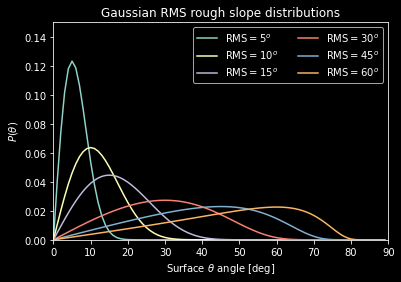

In [2]:
theta = np.arange(90)
t0_arr = (5, 10, 15, 30, 45, 60)
plt.figure()
for t0 in t0_arr:
    slopes = r.slope_dist(np.radians(theta), np.radians(t0), 'rms')
    plt.plot(theta, slopes, label=f'RMS$={t0}^o$')
plt.title('Gaussian RMS rough slope distributions')
plt.ylabel('$P(\\theta)$')
plt.xlabel('Surface $\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)
plt.legend(ncol=2)
plt.savefig(imgdir + 'rms_slopes.png', dpi=300)

## Theta-bar (Hapke 1984)

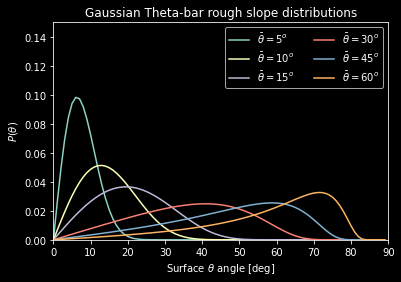

In [3]:
plt.figure()
for t0 in t0_arr:
    slopes = r.slope_dist(np.radians(theta), np.radians(t0), 'tbar')
    label = '$\\bar{\\theta}=$'
    plt.plot(theta, slopes, label=label+f'${t0}^o$')
plt.title('Gaussian Theta-bar rough slope distributions')
plt.ylabel('$P(\\theta)$')
plt.xlabel('Surface $\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)
plt.legend(ncol=2)
plt.savefig(imgdir + 'tbar_slopes.png', dpi=300)

## Correcting for viewing geometry

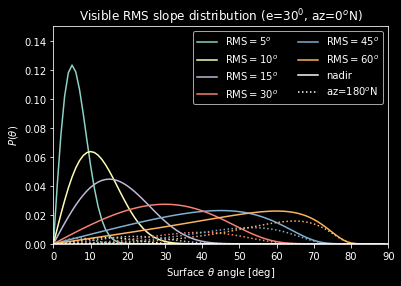

In [4]:
sc_theta = 30
sc_az = 0
sc_vector = r.sph2cart(sc_theta, sc_az)

thetas, azs = r.get_facet_grids(np.zeros((len(theta), len(theta))))
facet_vectors = r.sph2cart(np.radians(thetas), np.radians(azs))

plt.figure()
for t0 in t0_arr:
    slopes = r.slope_dist(np.radians(theta), np.radians(t0), 'rms')
    view_corr = r.view_correction(facet_vectors, sc_vector)
    vslopes = view_corr * slopes
    p = plt.plot(theta, slopes, label=f'RMS$={t0}^o$')
    # plt.plot(theta, vslopes[0], '--')
    plt.plot(theta, vslopes[len(vslopes)//2], ':', c=p[-1].get_color())
plt.title(f'Visible RMS slope distribution (e={sc_theta}$^0$, az={sc_az}$^o$N)')
plt.ylabel('$P(\\theta)$')
plt.xlabel('Surface $\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)

# Make legend
plt.plot([0, 90], [0, 0], 'w-', label='nadir')
plt.plot([0, 90], [0, 0], 'w:', label='az=180$^o$N')
plt.legend(ncol=2)
plt.savefig(imgdir + 'vis_slopes.png', dpi=300)